In [1]:
%pip install seaborn
# load data
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# warning
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
sales = pd.read_csv('supermarket_sales_raw.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 117.3+ KB


In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3


### Feature Engineering
Gross margin percentage adalah selisih antara Total pendapatan dengan cost of Goods Sold (cogs) dibagi dengan total pendapatan dengan satuan persen. Kapan industri dikatakan memiliki good gross margin? Berbeda industri tergantung ukuran dan kategori akan memiliki rule of thumb sendiri-sendiri untuk menyebutnya sebagai good. Rata-rata industri akan diusahakan mendapatkan 10% gross margin.

Gross income adalah pendapatan kotor yang diterima oleh perusahaan. Nilai ini merupakan biaya perolehan dikurangi penjualan bersih sebelum pajak dari penjualan.

In [4]:
#membuat kolom baru deg memasukkan formula dg fungsi apply
sales['gross_margin_percentage'] = sales.apply(lambda x:(x['Total']-x['cogs'])*100/x['Total'], axis=1)
sales['gross_income'] = sales.apply(lambda x:x['Total']-x['cogs'], axis=1)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,gross_margin_percentage,gross_income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1,4.761905,26.1415
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6,4.761905,3.8200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4,4.761905,16.2155
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4,4.761905,23.2880
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3,4.761905,30.2085


In [5]:
#membuat kolom baru dg mengekstrak tanggal
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Day'] = sales['Date'].dt.day
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year
sales['Hour'] = pd.to_datetime(sales['Time']).dt.hour
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,Rating,gross_margin_percentage,gross_income,Day,Month,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,9.1,4.761905,26.1415,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,9.6,4.761905,3.8200,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,7.4,4.761905,16.2155,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,8.4,4.761905,23.2880,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,5.3,4.761905,30.2085,8,2,2019,10


### Analisis 1 : Pada bulan kapan saja akan terjadi lonjakan total sales dan pada produk apa berdasarkan kota?

In [6]:
#membuat dataframe dari hasil group by
analisa_1 = pd.DataFrame(sales.groupby(['City','Product line','Month','Year'])['Total'].sum())
analisa_1 

Total
City      Product line           Month Year            
Mandalay  Electronic accessories 1     2019   6699.7770
                                 2     2019   6686.2530
                                 3     2019   3665.4135
          Fashion accessories    1     2019   6112.5960
                                 2     2019   6137.1135
                                 3     2019   4163.6070
          Food and beverages     1     2019   6609.2775
                                 2     2019   5554.8150
                                 3     2019   3050.7960
          Health and beauty      1     2019   6399.8865
                                 2     2019   5856.4275
                                 3     2019   7724.3460
          Home and lifestyle     1     2019   4586.4420
                                 2     2019   4659.8475
                                 3     2019   8302.8750
          Sports and travel      1     2019   6768.0795
                                 2     2019   5529.8145
                                 3     2019   7690.3050
Naypyitaw Electronic accessories 1     2019   5730.2385
                                 2     2019   5473.8810
                                 3     2019   7764.8550
          Fashion accessories    1     2019   6385.0290
                                 2     2019   7699.1145
                                 3     2019   7475.9265
          Food and beverages     1     2019   8315.0235
                                 2     2019   7391.3175
                                 3     2019   8060.5140
          Health and beauty      1     2019   6020.6895
                                 2     2019   5830.3455
                                 3     2019   4764.2910
          Home and lifestyle     1     2019   5594.7045
                                 2     2019   3002.9055
                                 3     2019   5297.9430
          Sports and travel      1     2019   8388.9960
                                 2     2019   3537.4185
                                 3     2019   3835.5135
Yangon    Electronic accessories 1     2019   6401.2725
                                 2     2019   5202.7710
                                 3     2019   6713.0700
          Fashion accessories    1     2019   6847.4910
                                 2     2019   5173.6335
                                 3     2019   4311.3840
          Food and beverages     1     2019   4646.2290
                                 2     2019   7054.2255
                                 3     2019   5462.6460
          Health and beauty      1     2019   3962.5950
                                 2     2019   2915.4825
                                 3     2019   5719.6755
          Home and lifestyle     1     2019  10313.5935
                                 2     2019   4771.6305
                                 3     2019   7331.9715
          Sports and travel      1     2019   6509.9475
                                 2     2019   4742.3775
                                 3     2019   8120.3745

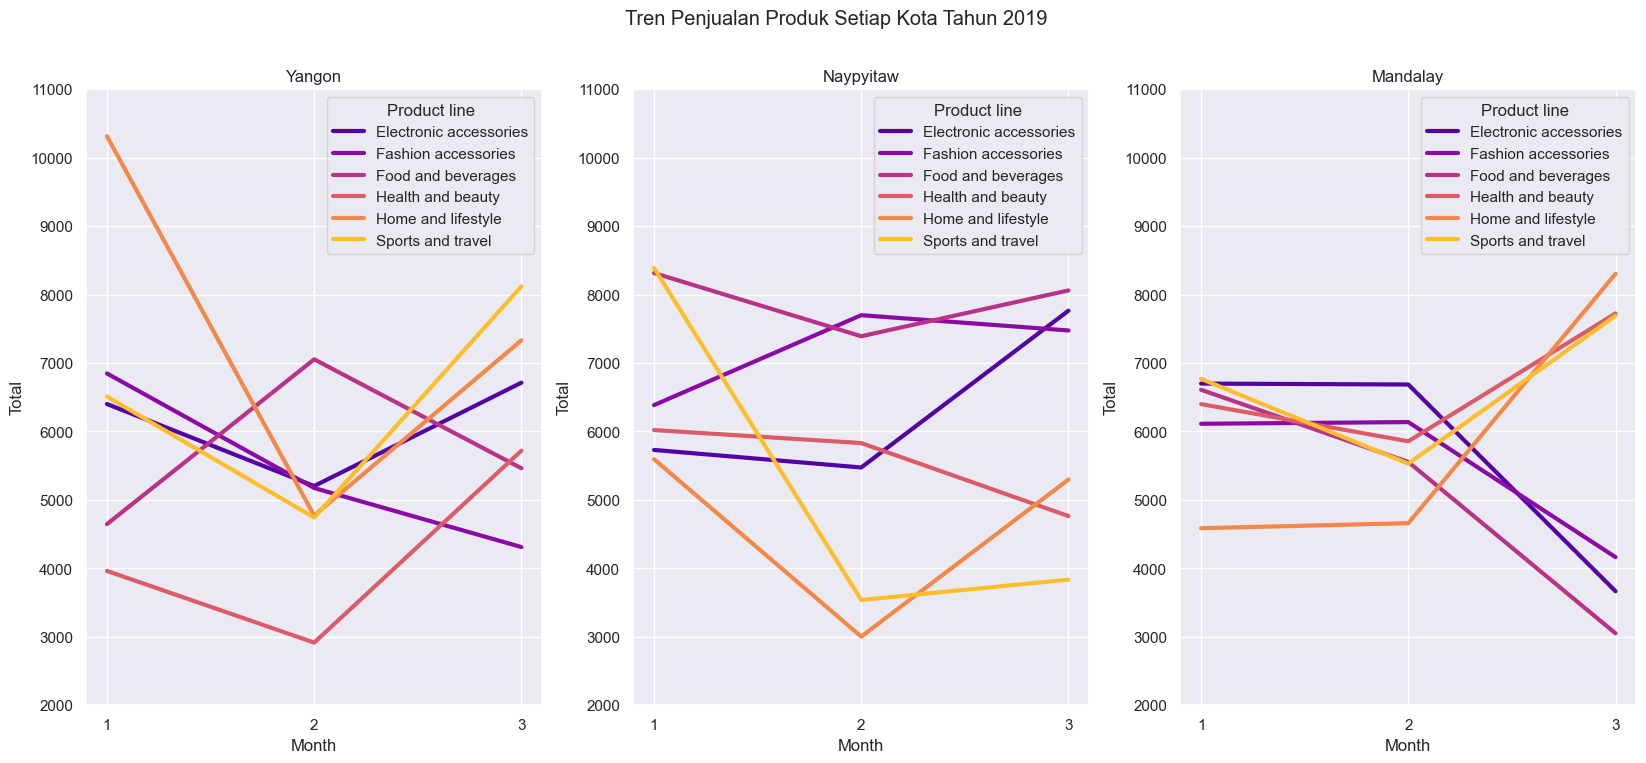

In [7]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})

fig, axes = plt.subplots(1, 3, sharey=False)
fig.suptitle('Tren Penjualan Produk Setiap Kota Tahun 2019')

city = [k for k in sales.City.unique()]
for i, kota in enumerate(city):
    sns.lineplot(data=analisa_1.xs(kota), x='Month', y = 'Total',
                 hue='Product line', palette='plasma',
                 legend='full', lw=3, ax=axes[i])
    axes[i].set_title(str(kota))
    axes[i].set_ylim(2000, 11000)
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(1))

### Analisis 2 : Menggunakan jenis pembayaran apa paling banyak customer membayar dan jenis pembayaran mana yang digunakan untuk pembelian dalam jumlah nominal yang besar?

In [8]:
#melakukan pivot tabel
sales.pivot_table(values= ['Total'], index='Payment', aggfunc=[np.sum, len])

,sum,len
,Total,Total
Payment,,
Cash,112206.570,344
Credit card,100767.072,311
Ewallet,109993.107,345


### Analisis 4 : Berapa jumlah produk yang terjual di kota tertentu dan dari tipe nasabah yang seperti apa?

In [9]:
sales.pivot_table(index=['City'], columns=['Product line'], values=['Quantity'], aggfunc= np.sum, margins=True)

Quantity                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                        316                 297                270   
Naypyitaw                       333                 342                369   
Yangon                          322                 263                313   
All                             971                 902                952   

                                                                           
Product line Health and beauty Home and lifestyle Sports and travel   All  
City                                                                       
Mandalay                   320                295               322  1820  
Naypyitaw                  277                245               265  1831  
Yangon                     257                371               333  1859  
All                        854                911               920  5510

### Analisis 5 : Produk apa yang memiliki rata-rata rating paling tinggi? Apakah rating tinggi juga ditunjukkan dengan jumlah quantity pembelian yang banyak? (Karena kemungkinan tiap kota seleranya berbeda, silakan dibedakan berdasarkan kota)

In [12]:
# mengatur palette
cm = sns.light_palette("green", as_cmap=True)

In [ ]:
sales.pivot_table(values=['Rating', 'Quantity'], index=['City', 'Product line'], aggfunc={'Rating':np.mean, 'Quantity':np.sum}).sort_values(by='Rating', ascending=False).style.background_gradient(cmap=cm).set_precision(2)

### Analisa 6 : Berapa minimal, mean, dan max gross income dan sales yang diperoleh dari masing-masing produk dan kota?

In [15]:
sales.groupby(['Product line', 'City'])[['Total','gross_income']].agg(['min', 'mean', 'max','sum'])

Total                                     \
                                      min        mean        max         sum   
Product line           City                                                    
Electronic accessories Mandalay   26.7225  310.026245   942.4485  17051.4435   
                       Naypyitaw  31.7520  344.890445   864.5700  18968.9745   
                       Yangon     30.4080  305.285225   931.0350  18317.1135   
Fashion accessories    Mandalay   35.1960  264.730911   874.1250  16413.3165   
                       Naypyitaw  13.1670  331.693385  1042.6500  21560.0700   
                       Yangon     12.6945  320.245265  1039.2900  16332.5085   
Food and beverages     Mandalay   56.4060  304.297770   888.6150  15214.8885   
                       Naypyitaw  22.6590  360.103864  1034.4600  23766.8550   
                       Yangon     33.4320  295.915526   932.3370  17163.1005   
Health and beauty      Mandalay   18.6375  376.993585   922.6350  19980.6600   
                       Naypyitaw  32.2770  319.525500   950.2500  16615.3260   
                       Yangon     19.2465  268.037298   752.6400  12597.7530   
Home and lifestyle     Mandalay   33.9360  350.983290  1022.4900  17549.1645   
                       Naypyitaw  14.6790  308.790067  1023.7500  13895.5530   
                       Yangon     19.1940  344.879931   951.8250  22417.1955   
Sports and travel      Mandalay   34.6290  322.390306   944.6220  19988.1990   
                       Naypyitaw  10.6785  350.265067  1002.1200  15761.9280   
                       Yangon     16.1070  328.350839   926.9505  19372.6995   

                                 gross_income                                 
                                          min       mean      max        sum  
Product line           City                                                   
Electronic accessories Mandalay        1.2725  14.763155  44.8785   811.9735  
                       Naypyitaw       1.5120  16.423355  41.1700   903.2845  
                       Yangon          1.4480  14.537392  44.3350   872.2435  
Fashion accessories    Mandalay        1.6760  12.606234  41.6250   781.5865  
                       Naypyitaw       0.6270  15.794923  49.6500  1026.6700  
                       Yangon          0.6045  15.249775  49.4900   777.7385  
Food and beverages     Mandalay        2.6860  14.490370  42.3150   724.5185  
                       Naypyitaw       1.0790  17.147803  49.2600  1131.7550  
                       Yangon          1.5920  14.091216  44.3970   817.2905  
Health and beauty      Mandalay        0.8875  17.952075  43.9350   951.4600  
                       Naypyitaw       1.5370  15.215500  45.2500   791.2060  
                       Yangon          0.9165  12.763681  35.8400   599.8930  
Home and lifestyle     Mandalay        1.6160  16.713490  48.6900   835.6745  
                       Naypyitaw       0.6990  14.704289  48.7500   661.6930  
                       Yangon          0.9140  16.422854  45.3250  1067.4855  
Sports and travel      Mandalay        1.6490  15.351919  44.9820   951.8190  
                       Naypyitaw       0.5085  16.679289  47.7200   750.5680  
                       Yangon          0.7670  15.635754  44.1405   922.5095

### Analisa 7 : Bandingkan total penjualan tiap bulannya dengan rata-rata total penjualan  di setiap kota

In [16]:
#Menggunakan as_index False untuk menjadikan kolom yg digroupby tdk menjadi multiIndex
analisa_7 = sales.groupby(['City', 'Month'], as_index=False)[['Total']].sum()
analisa_7

,City,Month,Total
0,Mandalay,1,37176.0585
1,Mandalay,2,34424.2710
2,Mandalay,3,34597.3425
3,Naypyitaw,1,40434.6810
4,Naypyitaw,2,32934.9825
5,Naypyitaw,3,37199.0430
6,Yangon,1,38681.1285
7,Yangon,2,29860.1205
8,Yangon,3,37659.1215


In [17]:
#Membuat kolom baru Average per City
analisa_7['mean'] = sales.groupby('City')['Total'].transform('mean')
analisa_7

,City,Month,Total,mean
0,Mandalay,1,37176.0585,312.354031
1,Mandalay,2,34424.2710,337.099715
2,Mandalay,3,34597.3425,312.354031
3,Naypyitaw,1,40434.6810,312.354031
4,Naypyitaw,2,32934.9825,312.354031
5,Naypyitaw,3,37199.0430,337.099715
6,Yangon,1,38681.1285,312.354031
7,Yangon,2,29860.1205,337.099715
8,Yangon,3,37659.1215,312.354031


In [18]:
# Berikan status jika lebih tinggi dari rata-rata atau lebih rendah atau sama
def status_sales(x):
    if x['Total'] < x['mean']:
        return "Lower"
    elif x['Total'] > x['mean']:
        return "Higher"
    else:
        return "Same"
analisa_7['status'] = analisa_7[['Total', 'mean']].apply(lambda x: status_sales(x), axis=1)
analisa_7

,City,Month,Total,mean,status
0,Mandalay,1,37176.0585,312.354031,Higher
1,Mandalay,2,34424.2710,337.099715,Higher
2,Mandalay,3,34597.3425,312.354031,Higher
3,Naypyitaw,1,40434.6810,312.354031,Higher
4,Naypyitaw,2,32934.9825,312.354031,Higher
5,Naypyitaw,3,37199.0430,337.099715,Higher
6,Yangon,1,38681.1285,312.354031,Higher
7,Yangon,2,29860.1205,337.099715,Higher
8,Yangon,3,37659.1215,312.354031,Higher


Jenis produk apa yang sering dibeli (dihitung dari jumlah customer) berdasar jenis kelamin dan jenis customernya?  

In [20]:
pd.crosstab(index = [sales['Product line'], sales.Gender] , columns=sales['Customer type'], margins=True)

Customer type                  Member  Normal   All
Product line           Gender                      
Electronic accessories Female      35      49    84
                       Male        43      43    86
Fashion accessories    Female      47      49    96
                       Male        39      43    82
Food and beverages     Female      51      39    90
                       Male        43      41    84
Health and beauty      Female      30      34    64
                       Male        43      45    88
Home and lifestyle     Female      47      32    79
                       Male        36      45    81
Sports and travel      Female      51      37    88
                       Male        36      42    78
All                               501     499  1000